# 라이브러리 설치 및 부착

In [2]:
# 필요한 패키지 설치
install.packages(c("tidyverse", "data.table", "ggplot2", "gridExtra", "rpart", "rpart.plot", "caret", "randomForest", "e1071", "pROC"))

# 필요한 패키지 로드
library(tidyverse)
library(data.table)
library(ggplot2)
library(gridExtra)
library(rpart)
library(rpart.plot)
library(caret)
library(randomForest)
library(e1071)
library(pROC)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Installing



---



# 1 데이터 파일 준비
##데이터 취득<br>
### NETFLIX_MOVIES.CSV


***제목 (*title*):***  영화의 제목으로, 각 영화를 식별하는 역할을 합니다.

***개봉 연도 (year) :*** 해당 영화가 개봉된 연도로, 영화의 시대나 흐름을 파악하는 데 사용될 수 있습니다.

***넷플릭스 시청 등급 (certificate) :*** 영화의 시청 등급을 나타내어 어떤 연령대의 시청자에게 적합한지 알려줍니다.

***상영 시간 (duration) :*** 영화의 전체 상영 시간으로, 얼마나 길게 관객들을 끌어들일 수 있는지를 나타냅니다.

***장르 (genre) :*** 해당 영화의 장르를 나타내어 특정 관심사나 취향을 고려하여 영화를 선택하는 데 도움이 됩니다.
하나로 쳐내야 할 듯

***IMDB 평점 (rating) :*** 영화의 IMDB 평점은 해당 작품의 전반적인 품질과 평가를 나타내며, 관객들의 기대치를 형성하는 데 도움이 됩니다.

***영화 소개 (description) :*** 영화의 간략한 소개로, 흥미를 유발하고 관객들에게 어떤 경험을 제공할지 미리 알려줍니다.

***주연 배우 (stars) :*** 해당 영화에 참여한 스타 배우의 이름을 나타내어 배우의 인기나 영화의 주요 특징을 강조할 수 있습니다.

***투표 인원 수 (votes) :*** IMDB에서 해당 영화에 대한 투표를 한 인원 수로, 영화의 인기나 관심도를 나타냅니다.


In [5]:

#https://drive.google.com/file/d/1RhDh3aslgmM7IGYrH4m4F6jE_0lCQzx8/view?usp=sharing
system("gdown --id 1RhDh3aslgmM7IGYrH4m4F6jE_0lCQzx8")
system("ls",TRUE)
# 파일 읽기
DF <- fread("/content/NETFLIX_MOVIE.csv", header = TRUE, encoding = "UTF-8") %>% as_tibble()


DF %>% show()

[1] "NETFLIX_MOVIE.csv" "sample_data"

# A tibble: 9,957 × 7
   title                  certificate duration genre          rating stars votes
   <chr>                  <chr>       <chr>    <chr>           <dbl> <chr> <chr>
 1 Cobra Kai              TV-14       30 min   Action, Comed…    8.5 ['Ra… 177,…
 2 The Crown              TV-MA       58 min   Biography, Dr…    8.7 ['Cl… 199,…
 3 Better Call Saul       TV-MA       46 min   Crime, Drama      8.9 ['Bo… 501,…
 4 Devil in Ohio          TV-MA       356 min  Drama, Horror…    5.9 ['Em… 9,773
 5 Cyberpunk: Edgerunners TV-MA       24 min   Animation, Ac…    8.6 ['Za… 15,4…
 6 The Sandman            TV-MA       45 min   Drama, Fantas…    7.8 ['To… 116,…
 7 Rick and Morty         TV-MA       23 min   Animation, Ad…    9.2 ['Ju… 502,…
 8 Breaking Bad           TV-MA       49 min   Crime, Drama,…    9.5 ['Br… 1,83…
 9 The Imperfects         TV-MA       45 min   Action, Adven…    6.3 ['Mo… 3,123
10 Blonde                 NC-17       166 min  Biography, Dr…    6.2 ['An… 935  
# ℹ 9,

In [11]:
# 데이터 통계 확인
summary(DF)

    title           certificate          duration            genre          
 Length:9957        Length:9957        Length:9957        Length:9957       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
     rating         stars              votes          
 Min.   :1.700   Length:9957        Length:9957       
 1st Qu.:6.100   Class :character   Class :character  
 Median :6.900   Mode  :character   Mode  :character  
 Mean   :6.764                                        
 3rd Qu.:7.600                                        
 Max.   :9.900                                        



---



# 2 데이터 취득과 정제 및 , 3 데이터 가공
데이터 정제<br>
genre열의 값이 최대 3가지가 있지만, 대표 장르 하나로 구분하기 위해 남은 두 항목을 배제하였습니다.<br>
votes 열도 수치형 변환하였습니다.<br>
duration 열도 min을 제거하고 수치형으로 변환하였습니다.<br>

In [6]:
# rating을 수치형으로 변환
DF$rating <- as.numeric(DF$rating)

#사용하지 않을 데이터 삭제
DF <- DF %>% select(-year, -description)


# genre 열을 여러 열로 분할
DF <- DF %>%
  separate(genre, into = c("genre1", "genre2", "genre3"), sep = ", ", fill = "right")

# 장르를 2번째와 3번째 속성에 저장
DF <- DF %>%
  mutate(genre2 = if_else(is.na(genre2) & !is.na(genre1), genre1, genre2),
         genre3 = if_else(is.na(genre3) & !is.na(genre2), genre2, genre3),
         genre2 = if_else(is.na(genre2) & !is.na(genre1), genre1, genre2),
         genre3 = if_else(is.na(genre3) & !is.na(genre2), genre2, genre3))

# genre2와 genre3 삭제
DF <- DF %>%
  select(-genre2, -genre3)

# genre1의 이름을 다시 genre로 바꾸기
DF <- DF %>%
  rename(genre = genre1)

# 정제된 데이터 확인
DF %>% show()

# votes 열에서 쉼표 제거하고 숫자로 변환
DF <- DF %>%
  mutate(votes = as.numeric(gsub(",", "", votes)))
# duration 열에서 "min" 항목 제거하고 숫자로 변환
DF <- DF %>%
  mutate(duration = as.numeric(str_remove(duration, " min")))

# 정제된 데이터 확인
DF %>% show()


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# A tibble: 9,957 × 7
   title                  certificate duration genre     rating stars      votes
   <chr>                  <chr>       <chr>    <chr>      <dbl> <chr>      <chr>
 1 Cobra Kai              TV-14       30 min   Action       8.5 ['Ralph M… 177,…
 2 The Crown              TV-MA       58 min   Biography    8.7 ['Claire … 199,…
 3 Better Call Saul       TV-MA       46 min   Crime        8.9 ['Bob Ode… 501,…
 4 Devil in Ohio          TV-MA       356 min  Drama        5.9 ['Emily D… 9,773
 5 Cyberpunk: Edgerunners TV-MA       24 min   Animation    8.6 ['Zach Ag… 15,4…
 6 The Sandman            TV-MA       45 min   Drama        7.8 ['Tom Stu… 116,…
 7 Rick and Morty         TV-MA       23 min   Animation    9.2 ['Justin … 502,…
 8 Breaking Bad           TV-MA       49 min   Crime        9.5 ['Bryan C… 1,83…
 9 The Imperfects         TV-MA       45 min   Action       6.3 ['Morgan … 3,123
10 Blonde                 NC-17       166 min  Biography    6.2 ['Andrew … 935  
# ℹ 9,

In [15]:
DF %>% show()

# A tibble: 9,957 × 7
   title                  certificate duration genre     rating stars      votes
   <chr>                  <chr>          <dbl> <chr>      <dbl> <chr>      <dbl>
 1 Cobra Kai              TV-14             30 Action       8.5 ['Ralph … 1.77e5
 2 The Crown              TV-MA             58 Biography    8.7 ['Claire… 2.00e5
 3 Better Call Saul       TV-MA             46 Crime        8.9 ['Bob Od… 5.01e5
 4 Devil in Ohio          TV-MA            356 Drama        5.9 ['Emily … 9.77e3
 5 Cyberpunk: Edgerunners TV-MA             24 Animation    8.6 ['Zach A… 1.54e4
 6 The Sandman            TV-MA             45 Drama        7.8 ['Tom St… 1.16e5
 7 Rick and Morty         TV-MA             23 Animation    9.2 ['Justin… 5.02e5
 8 Breaking Bad           TV-MA             49 Crime        9.5 ['Bryan … 1.83e6
 9 The Imperfects         TV-MA             45 Action       6.3 ['Morgan… 3.12e3
10 Blonde                 NC-17            166 Biography    6.2 ['Andrew… 9.35e2
# ℹ 9,

In [16]:
# 데이터 통계 재 확인
summary(DF)

    title           certificate           duration         genre          
 Length:9957        Length:9957        Min.   :  1.00   Length:9957       
 Class :character   Class :character   1st Qu.: 42.00   Class :character  
 Mode  :character   Mode  :character   Median : 67.00   Mode  :character  
                                       Mean   : 73.77                     
                                       3rd Qu.: 98.00                     
                                       Max.   :990.00                     
                                       NA's   :2036                       
     rating         stars               votes        
 Min.   :1.700   Length:9957        Min.   :      5  
 1st Qu.:6.100   Class :character   1st Qu.:    285  
 Median :6.900   Mode  :character   Median :   1187  
 Mean   :6.764                      Mean   :  19523  
 3rd Qu.:7.600                      3rd Qu.:   5422  
 Max.   :9.900                      Max.   :1844075  
 NA's   :1173         

In [7]:
# 결측값 확인
missing_values <- DF %>% summarise_all(~sum(is.na(.)))
print(missing_values)

# ration , vote 결측값 0으로 변경
DF <- DF %>%
  mutate(votes = ifelse(is.na(votes), 0, votes),
         rating = ifelse(is.na(rating), 0, rating))
print(missing_values)

# A tibble: 1 × 7
  title certificate duration genre rating stars votes
  <int>       <int>    <int> <int>  <int> <int> <int>
1     0           0     2036     0   1173     0  1173
# A tibble: 1 × 7
  title certificate duration genre rating stars votes
  <int>       <int>    <int> <int>  <int> <int> <int>
1     0           0     2036     0   1173     0  1173


## 결측값 확인
rating, vote 결측값이 1173개입니다.<br>
이 결측값을 가진 데이터 행들은 결국 투표 한 인원이 없는 것 이기 때문에, IMDB 점수가 0점입니다. 그리하여 결측값을 0으로 대체하였습니다.<br>
duration 결측값은 2036 개 이고, duration 열을 삭제하기엔 유의미한 데이터들을 담고 있어서 평균 값인 73.77로 결측값을 정해주었습니다.

In [8]:
# duration 열의 결측값을 평균 값으로 채우기
average_duration <- mean(DF$duration, na.rm = TRUE)

DF <- DF %>%
  mutate(duration = ifelse(is.na(duration), average_duration, duration))

In [9]:
#결측값 재 확인
missing_values <- DF %>% summarise_all(~sum(is.na(.)))
print(missing_values)


# A tibble: 1 × 7
  title certificate duration genre rating stars votes
  <int>       <int>    <int> <int>  <int> <int> <int>
1     0           0        0     0      0     0     0


In [17]:
DF %>% show()

# A tibble: 9,957 × 7
   title                  certificate duration genre     rating stars      votes
   <chr>                  <chr>          <dbl> <chr>      <dbl> <chr>      <dbl>
 1 Cobra Kai              TV-14             30 Action       8.5 ['Ralph … 1.77e5
 2 The Crown              TV-MA             58 Biography    8.7 ['Claire… 2.00e5
 3 Better Call Saul       TV-MA             46 Crime        8.9 ['Bob Od… 5.01e5
 4 Devil in Ohio          TV-MA            356 Drama        5.9 ['Emily … 9.77e3
 5 Cyberpunk: Edgerunners TV-MA             24 Animation    8.6 ['Zach A… 1.54e4
 6 The Sandman            TV-MA             45 Drama        7.8 ['Tom St… 1.16e5
 7 Rick and Morty         TV-MA             23 Animation    9.2 ['Justin… 5.02e5
 8 Breaking Bad           TV-MA             49 Crime        9.5 ['Bryan … 1.83e6
 9 The Imperfects         TV-MA             45 Action       6.3 ['Morgan… 3.12e3
10 Blonde                 NC-17            166 Biography    6.2 ['Andrew… 9.35e2
# ℹ 9,

## 이상값 확인


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




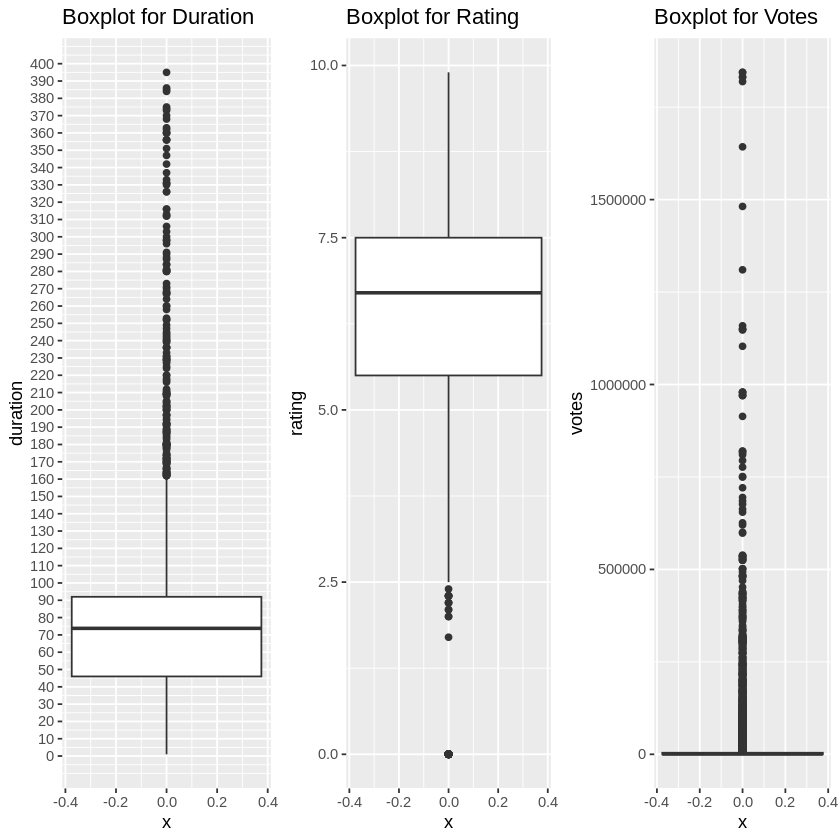

In [11]:


# duration, rating, votes(숫자형 데이터) 열에 대한 상자 그림 그래프
plot1 <- ggplot(DF, aes(x = NULL, y = duration)) +
  geom_boxplot() +
  ggtitle("Boxplot for Duration") +
  scale_y_continuous(breaks = seq(0, ceiling(max(DF$duration) / 10) * 10, 10))

plot2 <- ggplot(DF, aes(x = NULL, y = rating)) +
  geom_boxplot() +
  ggtitle("Boxplot for Rating")

plot3 <- ggplot(DF, aes(x = NULL, y = votes)) +
  geom_boxplot() +
  ggtitle("Boxplot for Votes")

# 그래프들을 가로로 배열
grid.arrange(plot1, plot2, plot3, ncol = 3)


Warning message:
“Use of `data[[column_name]]` is discouraged.
ℹ Use `.data[[column_name]]` instead.”
Warning message:
“Use of `data[[column_name]]` is discouraged.
ℹ Use `.data[[column_name]]` instead.”
Warning message:
“Use of `data[[column_name]]` is discouraged.
ℹ Use `.data[[column_name]]` instead.”
Warning message:
“Use of `data[[column_name]]` is discouraged.
ℹ Use `.data[[column_name]]` instead.”
Warning message:
“Use of `data[[column_name]]` is discouraged.
ℹ Use `.data[[column_name]]` instead.”
Warning message:
“Use of `data[[column_name]]` is discouraged.
ℹ Use `.data[[column_name]]` instead.”


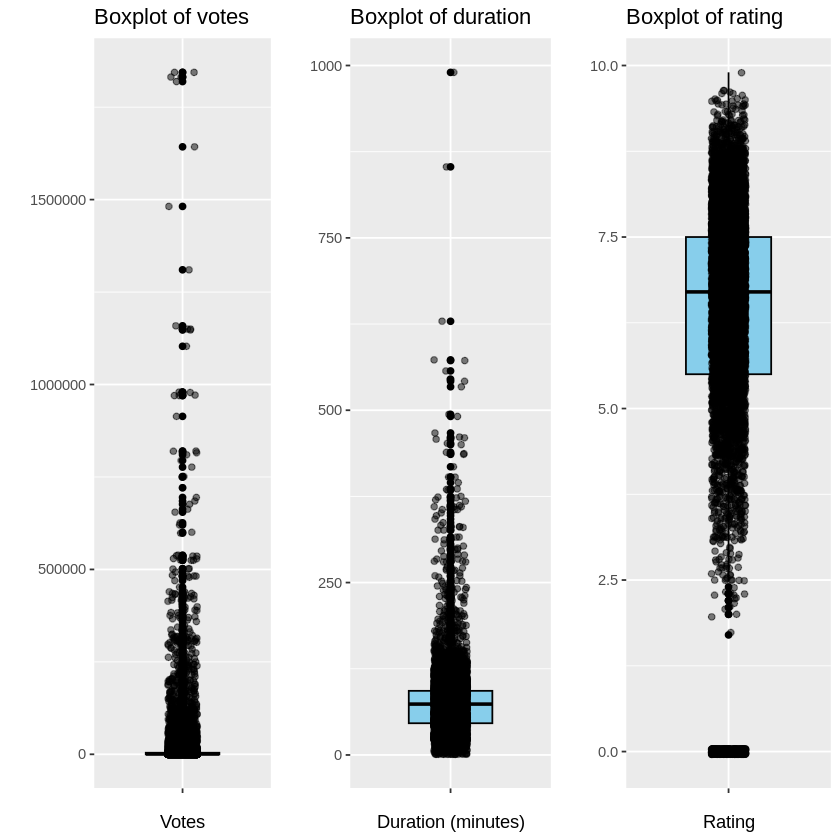

In [19]:
# votes, duration, rating에 대한 이상치 확인을 위한 그래프 함수
plot_outliers <- function(data, column_name, x_label) {
  ggplot(data, aes(x = "", y = data[[column_name]])) +
    geom_boxplot(fill = "skyblue", color = "black", width = 0.5) +
    geom_point(position = position_jitter(width = 0.1), alpha = 0.5) +
    labs(title = paste("Boxplot of", column_name),
         x = x_label,
         y = "")
}

# IQR을 사용하여 이상치 확인을 위한 함수
identify_outliers <- function(data, column_name) {
  Q1 <- quantile(data[[column_name]], 0.25)
  Q3 <- quantile(data[[column_name]], 0.75)
  IQR <- Q3 - Q1

  lower_bound <- Q1 - 1.5 * IQR
  upper_bound <- Q3 + 1.5 * IQR

  outliers <- data[data[[column_name]] < lower_bound | data[[column_name]] > upper_bound, ]
  return(outliers)
}

# IQR을 사용하여 이상치 확인 및 그래프 생성
votes_outliers <- identify_outliers(DF, "votes")
duration_outliers <- identify_outliers(DF, "duration")
rating_outliers <- identify_outliers(DF, "rating")

# votes, duration, rating에 대한 이상치 확인을 위한 그래프 생성
plot_votes <- plot_outliers(DF, "votes", "Votes")
plot_duration <- plot_outliers(DF, "duration", "Duration (minutes)")
plot_rating <- plot_outliers(DF, "rating", "Rating")

# 그래프 배열
grid.arrange(plot_votes, plot_duration, plot_rating, ncol = 3)

확인 결과, rationg (10점 만점) 은 10점을 넘기는 값이 없습니다.-> 이상값 없음 <br>
vote 도 마찬가지로 투표 인원수가 많거나 적다고 하여 이상값은 아니라고 판단했습니다 -> 이상값 없음<br>
하지만 duration 속성에서 400분 이상의 영화는 없다고 판단하고 이상값들을 제거 하였습니다.<br>(몇몇 영화들은 장시간의 상영 시간을 가지고 있지만, 특수한 케이스라고 판단하고 배제하였습니다.)

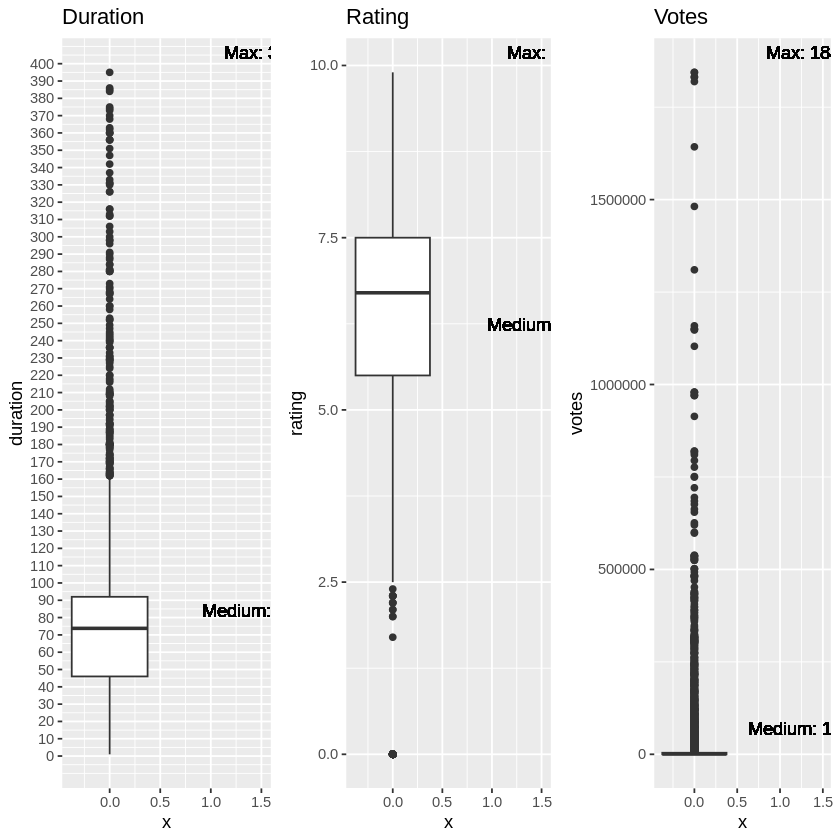

In [12]:
# duration이 400 이상인 행 제거
DF <- DF[DF$duration < 400, ]

# 최댓값과 평균을 추가하는 함수 정의
add_annotations <- function(plot, variable) {
  max_val <- max(DF[[variable]])
  mean_val <- mean(DF[[variable]])

  plot +
    geom_text(aes(x = 1.5, y = max_val, label = paste("Max:", round(max_val, 2))), vjust = -1) +
    geom_text(aes(x = 1.5, y = mean_val, label = paste("Medium:", round(mean_val, 2))), vjust = -1)
}

# duration, rating, votes 열에 대한 상자 그림
plot1 <- ggplot(DF, aes(x = NULL, y = duration)) +
  geom_boxplot() +
  ggtitle("Duration") +
  scale_y_continuous(breaks = seq(0, ceiling(max(DF$duration) / 10) * 10, 10))

plot1 <- add_annotations(plot1, "duration")

plot2 <- ggplot(DF, aes(x = NULL, y = rating)) +
  geom_boxplot() +
  ggtitle("Rating")

plot2 <- add_annotations(plot2, "rating")

plot3 <- ggplot(DF, aes(x = NULL, y = votes)) +
  geom_boxplot() +
  ggtitle("Votes")

plot3 <- add_annotations(plot3, "votes")

# 그래프들을 가로로 배열
grid.arrange(plot1, plot2, plot3, ncol = 3)




---



가공 완료한 DF를 DF1에 복사하여, 필요 시 사용하기 편리하게 합니다.


In [13]:
DF1 <- DF
print(DF1)

# A tibble: 9,934 × 7
   title                  certificate duration genre     rating stars      votes
   <chr>                  <chr>          <dbl> <chr>      <dbl> <chr>      <dbl>
 1 Cobra Kai              TV-14             30 Action       8.5 ['Ralph … 1.77e5
 2 The Crown              TV-MA             58 Biography    8.7 ['Claire… 2.00e5
 3 Better Call Saul       TV-MA             46 Crime        8.9 ['Bob Od… 5.01e5
 4 Devil in Ohio          TV-MA            356 Drama        5.9 ['Emily … 9.77e3
 5 Cyberpunk: Edgerunners TV-MA             24 Animation    8.6 ['Zach A… 1.54e4
 6 The Sandman            TV-MA             45 Drama        7.8 ['Tom St… 1.16e5
 7 Rick and Morty         TV-MA             23 Animation    9.2 ['Justin… 5.02e5
 8 Breaking Bad           TV-MA             49 Crime        9.5 ['Bryan … 1.83e6
 9 The Imperfects         TV-MA             45 Action       6.3 ['Morgan… 3.12e3
10 Blonde                 NC-17            166 Biography    6.2 ['Andrew… 9.35e2
# ℹ 9,



---



# 4 데이터 시각화
데이터들의 관계성을 시각화하여 수치, 특성 및 관계성을 파악합니다.

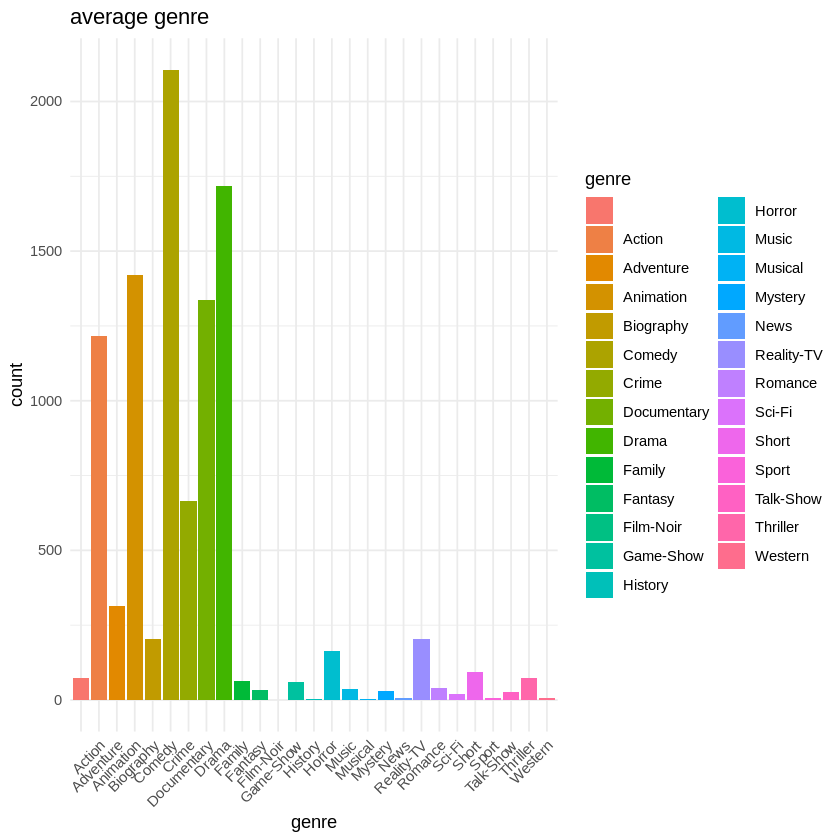

In [16]:
# 장르별 분포를 나타내는 바 그래프
ggplot(DF1, aes(x = genre, fill = genre)) +
  geom_bar() +
  labs(title = "average genre",
       x = "genre",
       y = "count") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


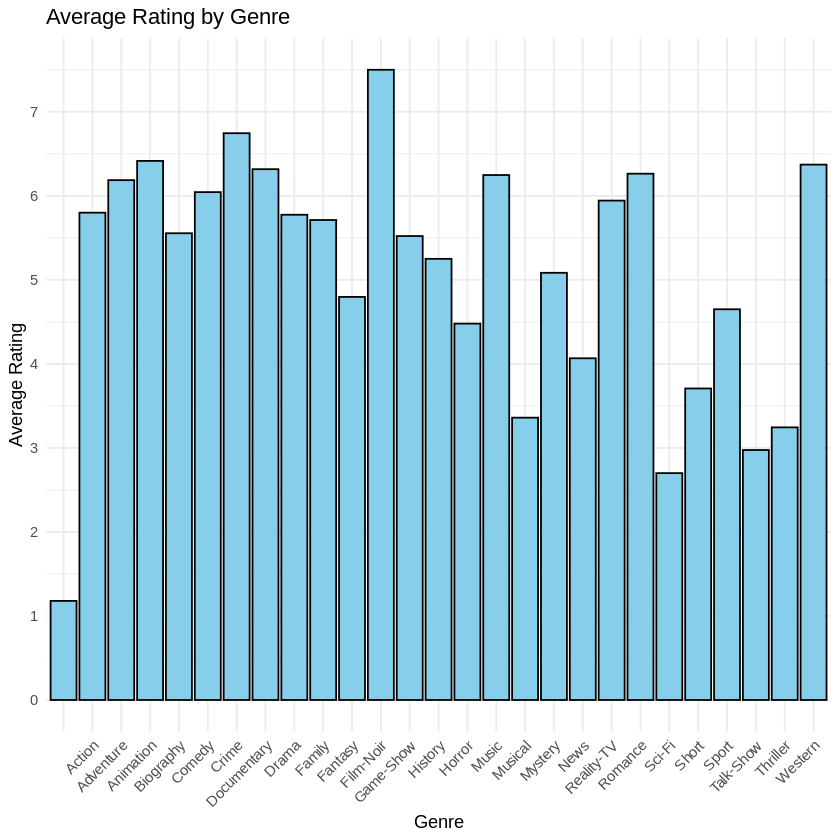

In [20]:
# GENRE에 따른 RATING 막대 평균 그래프 생성 (x 축 레이블 45도 회전, y 축 1 단위로 나열)
ggplot(DF1, aes(x = genre, y = rating)) +
  geom_bar(stat = "summary", fun = "mean", fill = "skyblue", color = "black") +
  labs(title = "Average Rating by Genre",
       x = "Genre",
       y = "Average Rating") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
        axis.ticks.y = element_blank()) +  # Y축 눈금 제거
  scale_y_continuous(breaks = seq(0, 10, 1))  # Y축 눈금 1 단위로 설정


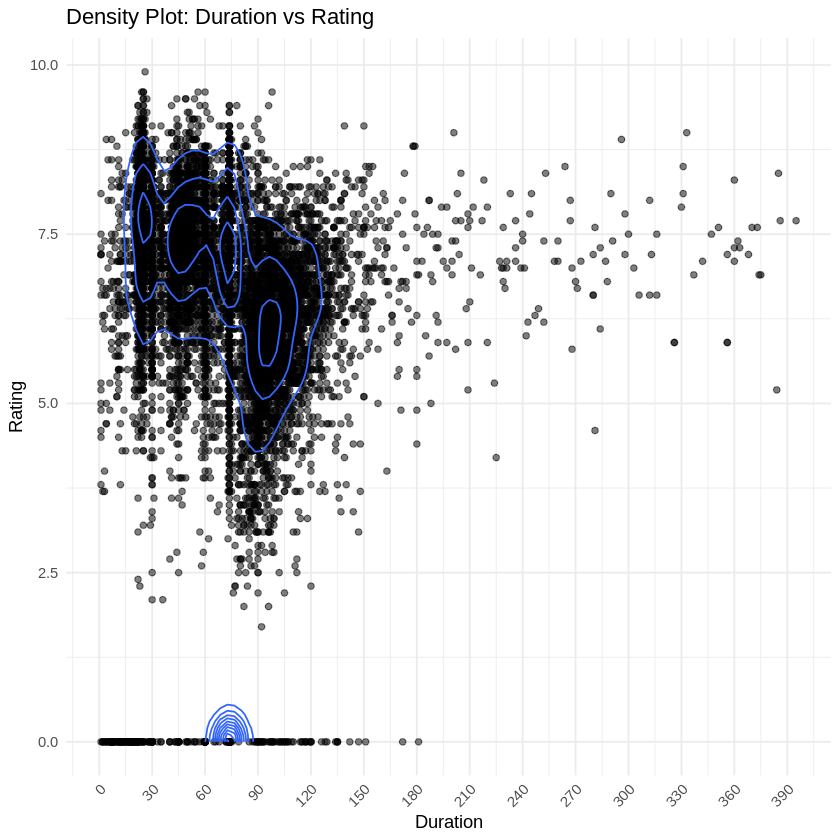

In [27]:
# duration과 rating 간의 관계 Density plot 그래프 생성 (X축 값 분위 설정)
ggplot(DF1, aes(x = duration, y = rating)) +
  geom_point(alpha = 0.5) +
  geom_density_2d() +
  labs(title = "Density Plot: Duration vs Rating",
       x = "Duration",
       y = "Rating") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  scale_x_continuous(breaks = seq(0, max(DF1$duration), 30))




---



# 5 가설 수립

<BR>
귀무가설 (H0): 투표 인원 수와 IMDB 평점은 상관 관계가 없다.<BR>
대립가설 (H1): 많은 투표를 받은 영화일수록 높은 IMDB 평점을 받는다.

*투표를 많이 한다는 것은 그만큼 사람들이 많이 시청하였고 인기가 많은 영화이기 때문이다.*





---



# 6-1 모델 분석 - 회귀 모델

In [28]:
# 회귀 모델: 투표 인원 수와 IMDB 평점
model_votes <- lm(rating ~ votes, data = DF1)

# 가설 설정
H0_votes <- "투표 인원 수와 IMDB 평점 사이에 상관 관계가 없다."
H1_votes <- "많은 투표를 받은 영화일수록 높은 IMDB 평점을 받는다."

# 회귀 분석 결과 요약
summary_votes <- summary(model_votes)

# 계수 테이블 출력
cat("계수 테이블:\n")
print(summary_votes$coefficients)

# p-value 확인
p_value_votes <- summary_votes$coefficients["votes", "Pr(>|t|)"]

# p-value 확인
cat("투표 인원 수와 IMDB 평점에 대한 가설 검정:\n")
cat("H0:", H0_votes, "\n")
cat("H1:", H1_votes, "\n")
cat("유의 수준: 0.05\n")  # 여기서 0.05를 직접 입력

# 계수 테이블이 존재하는지 확인
if ("votes" %in% rownames(summary_votes$coefficients)) {
  # 결과 출력
  if (p_value_votes < 0.05) {  # 여기서 0.05를 직접 입력
    cat("결과: H0 기각. H1을 지지하는 유의한 증거가 있습니다.\n")
  } else {
    cat("결과: H0 기각 실패. H1을 지지하기에는 증거가 부족합니다.\n")
  }
} else {
  cat("회귀 분석 결과에 오류가 있습니다. 'votes' 열이 계수 테이블에 존재하지 않습니다.\n")
}


계수 테이블:
                Estimate   Std. Error   t value     Pr(>|t|)
(Intercept) 5.894955e+00 2.500642e-02 235.73768 0.000000e+00
votes       3.961698e-06 2.966554e-07  13.35455 2.480132e-40
투표 인원 수와 IMDB 평점에 대한 가설 검정:
H0: 투표 인원 수와 IMDB 평점 사이에 상관 관계가 없다. 
H1: 많은 투표를 받은 영화일수록 높은 IMDB 평점을 받는다. 
유의 수준: 0.05
결과: H0 기각. H1을 지지하는 유의한 증거가 있습니다.


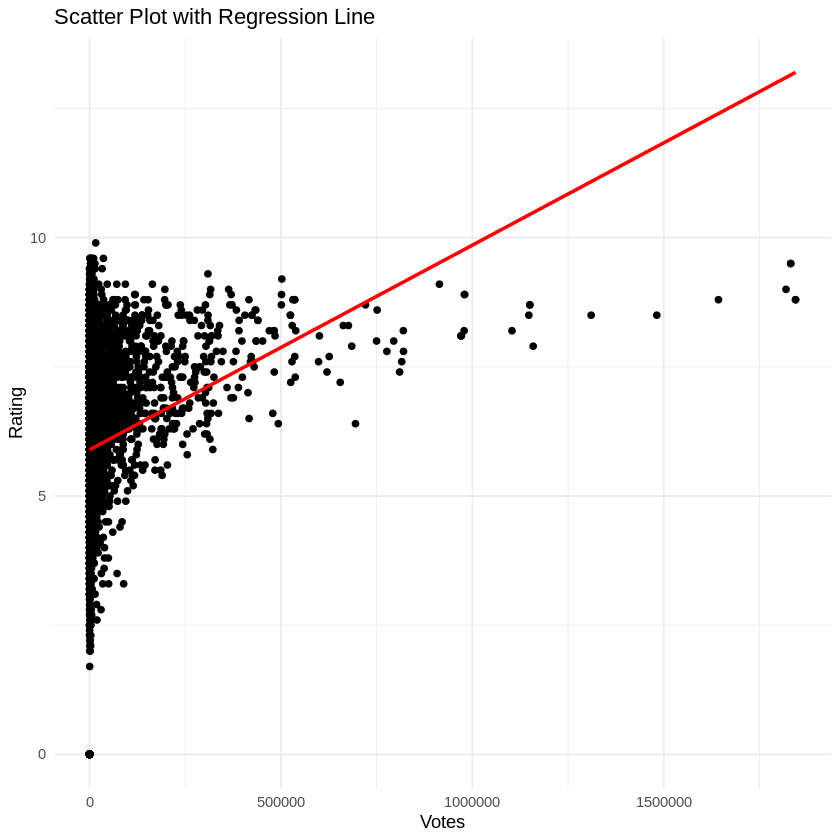

In [29]:

# 산점도와 회귀선 시각화
ggplot(DF1, aes(x = votes, y = rating)) +
  geom_point() +             # 산점도 추가
  geom_smooth(method = "lm",  # 회귀선 추가
              formula = y ~ x,
              se = FALSE,       # 회귀선 주위의 신뢰구간을 표시하지 않음
              color = "red") +  # 회귀선 색상 지정
  labs(title = "Scatter Plot with Regression Line",
       x = "Votes",
       y = "Rating") +
  theme_minimal()


## 결과
**가설 H1 :** "*많은 투표를 받은 영화는 높은 IMDB 평점을 받는 경향이 있다"*<BR>
에 대한 유의미한 증거는 통계적으로 유의미하며, 투표 인원 수가 증가함에 따라 IMDB 평점도 증가하는 경향을 보인다고 해석할 수 있습니다.<BR>

**Votes (투표 인원 수):** 투표 인원 수의 계수는 3.961698e-06로, 이 값이 유의미한지를 나타내는 t-value는 13.35455이며 p-value는 2.480132e-40입니다. 이는 투표 인원 수가 IMDB 평점에 영향을 미친다는 것을 나타냅니다. 즉, 투표 인원 수가 증가할수록 IMDB 평점도 증가하는 경향이 있다고 할 수 있습니다.

**가설 검정 결과:** 유의 수준이 0.05로 설정되었고 p-value가 이보다 작으므로, 귀무가설(H0)을 기각합니다. 따라서 많은 투표를 받은 영화일수록 높은 IMDB 평점을 받는다는 대립가설(H1)을 지지하는 유의한 증거가 있다고 결론지을 수 있습니다.

결론적으로, 이 회귀 분석 결과는 투표 인원 수와 IMDB 평점 간에 통계적으로 유의미한 상관 관계가 있음을 나타냅니다. 다시 말해, 많은 투표를 받은 영화는 높은 IMDB 평점을 받을 가능성이 높다고 할 수 있습니다.

  

---



# 6-2 모델 분석 - 분류모델

**분류모델**


장르와 상영 시간, 투표 인원수 IMDB 평점 사이의 관계성을 분류 모델을 사용하여 파악한 후 추후 넷플릭스가 해당 관계성을 고려하여 콘텐츠를 등록할 때 높은 평점의 IMDB 평점 영화를 예측하여 등록시킬 있게끔 모델링합니다. <BR>

**랜덤 포래스트**, **로지스틱**, **SVM**  분류 모델로 분석하였습니다.
<br><br>
title, stars 는 제외하고, rating을 목표 변수로 설정하고 나머지 데이터들의 관계성을 확인하였습니다.


## 6-2-a Random Forest 모델



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



            IncNodePurity
certificate      5162.490
duration         6096.484
genre            2209.240
votes           33293.459


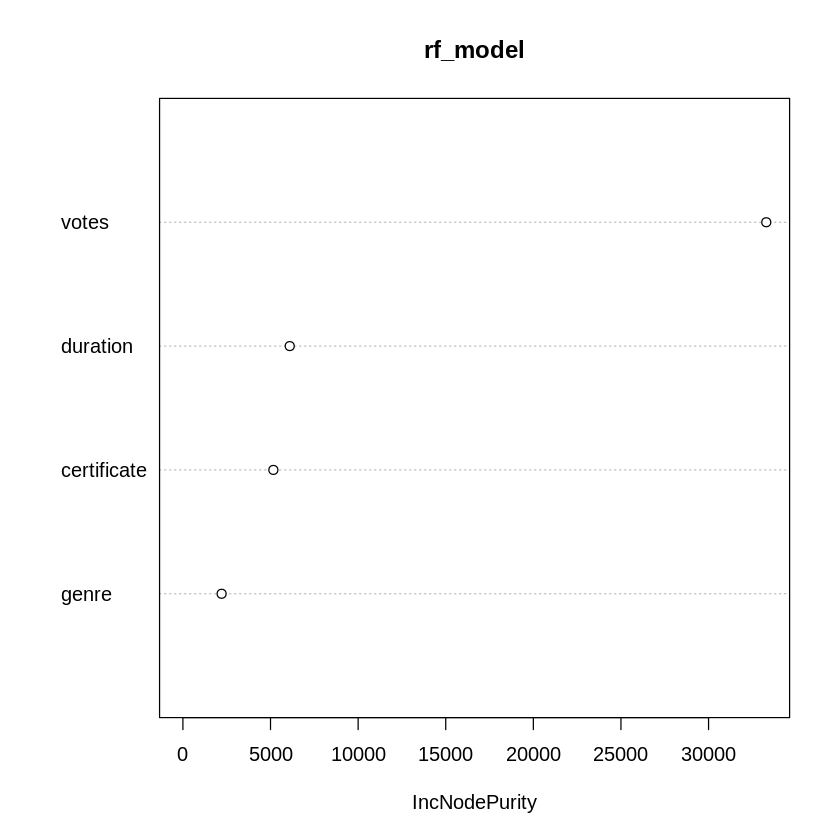

In [18]:


# 목표 변수와 설명 변수 지정
target_variable <- DF1$rating
features <- DF1[, !(names(DF1) %in% c("title","stars","rating"))]

# 랜덤 포레스트 모델 훈련
rf_model <- randomForest(target_variable ~ ., data = features)

# 변수 중요도 확인
varImpPlot(rf_model)

# 변수 중요도 확인 (수치로 출력)
importance_values <- importance(rf_model)

# 결과 출력
print(importance_values)


### 결과

**certificate (시청 등급) - 5162.490<br>**
certificate 변수의 IncNodePurity 값은 5162.490입니다. 이 값이 높다는 것은 이 변수가 노드의 순도를 크게 증가시킨다는 의미입니다. 따라서 certificate가 모델에서 중요하게 사용되었음을 나타냅니다.


**duration (상영 시간) - 6096.484<br>**
duration 변수의 IncNodePurity 값은 6096.484입니다. duration이 노드의 순도를 크게 증가시키는 정도가 높다는 것을 의미합니다. 이 변수도 모델에서 중요한 역할을 한 것으로 해석됩니다.

**genre (장르) - 2209.240<br>**
genre 변수의 IncNodePurity 값은 2209.240으로, genre 정보도 모델에서 일정한 영향을 가졌음을 나타냅니다. 노드의 순도를 증가시키는 정도가 어느 정도 높다는 것을 의미합니다.

**votes (투표자 수) - 33293.459<br>**
votes 변수의 IncNodePurity 값은 33293.459로 매우 높습니다. 이는 votes가 모델에서 ***매우 중요하게 사용되었음***을 나타냅니다. 노드의 순도를 크게 높이는 데 기여한 것으로 해석됩니다.
이 값들은 모델이 특정 변수의 값을 사용하여 노드를 얼마나 순수하게 나누는지를 나타내므로, 높은 값은 해당 변수가 모델에 큰 영향을 미쳤음을 의미합니다.

## 6-2-b 로지스틱 분류 모델

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = target_variable ~ ., family = "binomial", data = features)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)          -1.612e+00  3.246e-01  -4.968 6.77e-07 ***
certificate12         1.180e+01  8.827e+02   0.013  0.98933    
certificateApproved   2.092e+00  1.047e+00   1.998  0.04575 *  
certificateE10+      -1.456e+01  8.827e+02  -0.016  0.98684    
certificateG          1.265e+00  6.469e-01   1.956  0.05049 .  
certificateM          1.407e+01  8.827e+02   0.016  0.98728    
certificateMA-17     -1.637e+01  8.827e+02  -0.019  0.98521    
certificateNC-17      1.420e+01  4.401e+02   0.032  0.97427    
certificateNot Rated  7.232e-01  1.330e-01   5.438 5.40e-08 ***
certificatePassed     1.341e+01  3.394e+02   0.040  0.96848    
certificatePG         5.275e-01  2.636e-01   2.001  0.04535 *  
certificatePG-13      2.859e-01  2.246e-01   1.273  0.20313    
certificateR          1.528e-01  1.556e-01   0.982  0.32620    
certifica

Setting levels: control = 0, case = 1

Setting direction: controls < cases



      Predicted
Actual    0    1
     0  436 1451
     1  171 7876


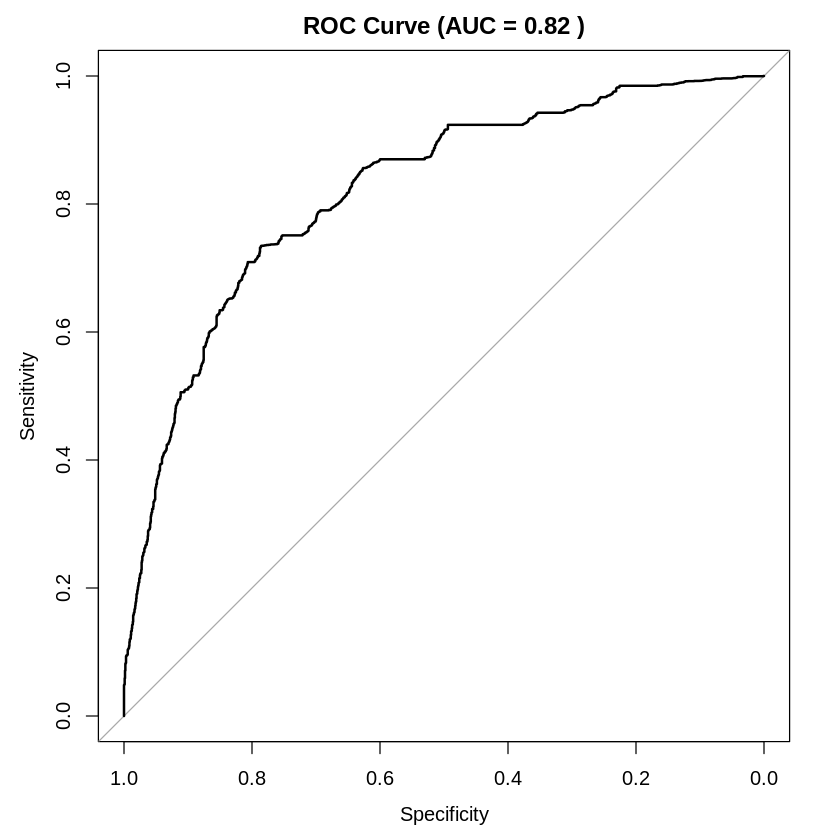

In [30]:

# "rating" 열을 이진 분류로 변환
DF1$binary_rating <- ifelse(DF1$rating >= 5, 1, 0)

# 목표 변수와 설명 변수 재지정
target_variable <- DF1$binary_rating
features <- DF1[, !(names(DF1) %in% c("title","stars","rating","binary_rating"))]

# 로지스틱 회귀 모델 훈련
logistic_model <- glm(target_variable ~ ., data = features, family = "binomial")

# 로지스틱 회귀 모델 결과 요약
summary(logistic_model)

# 로지스틱 회귀 모델의 예측 확률 계산
predicted_probabilities <- predict(logistic_model, type = "response")

# 결과를 데이터프레임에 추가
result_df <- data.frame(Actual = as.factor(target_variable), Predicted = predicted_probabilities)

# ROC 곡선 그리기
roc_curve <- roc(result_df$Actual, result_df$Predicted)
auc_value <- auc(roc_curve)

# ROC Curve와 AUC를 출력
plot(roc_curve, main = paste("ROC Curve (AUC =", round(auc_value, 2), ")"))

# Confusion Matrix 출력
conf_matrix <- table(Actual = as.factor(target_variable), Predicted = ifelse(predicted_probabilities > 0.5, 1, 0))
print(conf_matrix)


### 결과

**Certificate**

"certificate12"의 양수인 계수는 해당 등급이 있는 경우 로그 오즈가 증가한다는 것을 의미합니다. "certificateApproved"의 계수도 양수이므로, 해당 등급이 있는 경우 로그 오즈가 증가합니다.
"certificatePG"의 계수도 양수이며 유의미한 p-value를 가지므로, 해당 등급이 있는 경우 로그 오즈가 증가하는 경향이 있습니다.
"certificateTV-14", "certificateTV-G", "certificateTV-MA", "certificateTV-PG", "certificateTV-Y", "certificateTV-Y7", "certificateTV-Y7-FV" 등의 TV 등급도 로그 오즈에 영향을 미칩니다.
<br><br>

**genre**

다양한 장르 변수들이 모델에 포함되어 있습니다. 예를 들어, "genreAction", "genreAdventure", "genreAnimation", "genreComedy", "genreCrime", "genreDocumentary", "genreDrama", "genreFamily", "genreFantasy", "genreMusic", "genreMystery", "genreReality-TV", "genreRomance" 등의 계수가 양수이므로 해당 장르가 있는 경우 로그 오즈가 증가합니다.<br><br>

**duration 및 votes**

"duration"의 계수가 거의 0에 가깝기 때문에 이 변수는 로그 오즈에 큰 영향을 미치지 않는 것으로 보입니다."votes"의 계수는 양수이므로, 투표 수가 증가할수록 로그 오즈도 증가합니다.
<br><br>

**모델 적합성**

Null deviance와 Residual deviance를 통해 모델이 데이터에 잘 맞는 것을 확인할 수 있습니다. Residual deviance가 감소하면서 모델이 설명 변수를 포함함에 따라 더 좋은 적합도를 보이고 있습니다.
<br><br>

**분류 결과**

Confusion Matrix를 통해 모델의 분류 성능을 확인할 수 있습니다. 예측이 실제 값과 얼마나 일치하는지를 보여주는 지표로 사용됩니다.
종합적으로, 주어진 결과에 따르면 특정 등급과 장르가 영화의 성공 여부에 영향을 미칠 수 있으며, 투표 수도 영향을 미칠 수 있습니다.

## 6-2-c SVM 모델

In [21]:


# binary_rating 열 생성
DF1$binary_rating <- ifelse(DF1$rating >= 5, 1, 0)

# 목표 변수와 설명 변수 재지정
target_variable <- as.factor(DF1$binary_rating)
features <- DF1[, c("certificate", "duration", "genre", "rating", "votes")]

# 범주형 변수 변환
features$certificate <- as.factor(features$certificate)
features$genre <- as.factor(features$genre)

# 데이터 분할 (훈련 데이터와 테스트 데이터)
set.seed(123)  # 시드 설정 (재현성을 위해)
split_index <- createDataPartition(target_variable, p = 0.7, list = FALSE)
train_data <- features[split_index, ]
test_data <- features[-split_index, ]
train_labels <- target_variable[split_index]
test_labels <- target_variable[-split_index]

# SVM 모델 훈련 (선형 커널, 비용 매개 변수 설정)
svm_model <- svm(train_labels ~ ., data = train_data, kernel = "linear", cost = 10)

# 테스트 데이터로 예측
predictions <- predict(svm_model, test_data)

# 모델 평가
conf_matrix <- table(predictions, test_labels)
print(conf_matrix)

# 정확도 계산
accuracy <- sum(diag(conf_matrix)) / sum(conf_matrix)
print(paste("Accuracy:", accuracy))


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice



           test_labels
predictions    0    1
          0  564    3
          1    2 2411
[1] "Accuracy: 0.998322147651007"



**실제 0, 예측 0 (True Negative) :** 564 건<br>
**실제 0, 예측 1 (False Positive):** 3 건<br>
**실제 1, 예측 0 (False Negative):** 2 건<br>
**실제 1, 예측 1 (True Positive) :** 2411 건<br>

***[1] "Accuracy: 0.998322147651007"***

정확도는 **99.83%로 매우 높습니다.** 이는 대부분의 경우에 모델이 정확하게 예측했다는 것을 나타냅니다.

추가적인 성능 평가를 위해 ROC 곡선과 AUC 값을 살펴보았다면,AUC 값이 1에 가까울수록 모델이 좋은 성능을 보입니다.

AUC 값 확인

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Setting levels: control = 1, case = 2

Setting direction: controls < cases



AUC: 0.9976118 


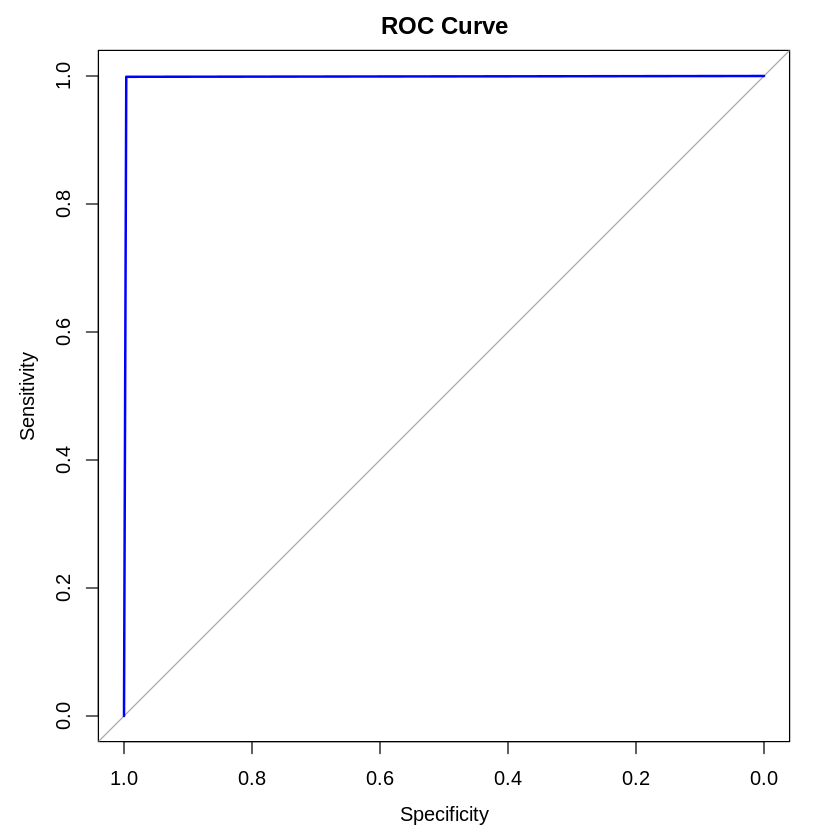

In [31]:

# SVM 모델 훈련 (선형 커널, 비용 매개 변수 설정)
svm_model <- svm(train_labels ~ ., data = train_data, kernel = "linear", cost = 10)

# 테스트 데이터로 예측
predictions <- predict(svm_model, test_data)

# Convert predictions and test_labels to numeric
predictions_numeric <- as.numeric(predictions)
test_labels_numeric <- as.numeric(test_labels)

# pROC 패키지를 사용하여 ROC 곡선 및 AUC 계산
roc_curve <- roc(test_labels_numeric, predictions_numeric)
auc_value <- auc(roc_curve)

# ROC 곡선 시각화
plot(roc_curve, main = "ROC Curve", col = "blue")

# AUC (Area Under the Curve) 값 출력
cat("AUC:", auc_value, "\n")


**ROC 곡선 (Receiver Operating Characteristic Curve):** 이 그래프는 모델의 성능을 시각적으로 표현합니다. X축은 거짓 양성 비율(FPR), Y축은 진짜 양성 비율(TPR, 민감도)입니다. 곡선이 왼쪽 위 모서리로 향할수록 모델의 성능이 더 좋다고 볼 수 있습니다.
<br><br>
**AUC (Area Under the Curve):** ROC 곡선 아래의 면적으로, 모델의 성능을 수치로 나타냅니다. AUC 값이 1에 가까울수록 모델이 좋은 성능을 가진다고 해석됩니다. 여기서 얻은 ***AUC 값인 0.9976118은 매우 높은 수치***이며, ***모델이 데이터를 잘 분류하고 있다는 것***을 나타냅니다.

AUC 값이 0.9976118은 매우 높은 성능을 나타냅니다. AUC는 ROC 곡선 아래의 면적을 나타내며, 이 값이 1에 가까울수록 모델의 분류 성능이 우수합니다. 따라서 현재의 AUC 값은 모델이 양성과 음성 클래스를 매우 잘 구분하고 있다는 것을 의미합니다.

일반적으로, AUC 값이 0.5에 가까우면 모델의 성능이 랜덤 수준이며, 1에 가까울수록 모델의 성능이 우수합니다. 여기서 얻은 0.9976118은 거의 완벽한 분류 성능을 나타냅니다.

따라서 해당 SVM 모델은 주어진 테스트 데이터에서 매우 뛰어난 이진 분류 성능을 보이고 있으며, 양성과 음성 클래스를 효과적으로 구분하고 있습니다.








# 7 결론
넷플릭스 콘텐츠의 데이터들이 IMDB 점수와 어떤 영향이 있는지 확인해 보았습니다. 투표자 인원이 높을수록 IMDB 점수를 높게 받는 경향이 있고, 이는 선형회귀를 통하여 유의미한 정보를 보여주고 있습니다. 또한 각 데이터들 간의 관계성을 분류 모델 Random Forest , Logistic , SVM으로 분석해 본 결과, SVM이 가장 높은 적합도를 보였고. 이 데이터 셋에서 데이터를 가장 잘 분류하는 모델로 선정되었습니다. 결론적으로 투표 인원수와 IMDB 평가 점수는 긴밀한 관계성을 가지고 있다는 것을 선형 회귀 모델과 3가지의 분류 모델이 유의미하게 보여주고 있습니다. 이를 통하여 넷플릭스에서는 투표 인원수를 통하여 IMDB 평가 점수를 예측하고 평가 점수가 높은 콘텐츠들을 넷플릭스에 등록시킬 수 있습니다.
